# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
merge_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Checking the number of mice.
mice = merge_data_df['Mouse ID'].value_counts()
mice_number = len(mice)
mice_number

249

In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped = merge_data_df.groupby(['Mouse ID'])
duplicates = grouped['Timepoint'].value_counts()
duplicates_df = duplicates.to_frame()
final_duplicates = duplicates_df.loc[(duplicates_df['Timepoint'] > 1)]
final_duplicates

Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merge_data_df[merge_data_df['Mouse ID'] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_data_df[merge_data_df['Mouse ID'] !="g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice in the clean DataFrame.
total_mice = clean_df['Mouse ID'].value_counts()
len(total_mice)


248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_df = clean_df.groupby('Drug Regimen')
mean_tumor = regimen_df['Tumor Volume (mm3)'].mean()
median_tumor = regimen_df['Tumor Volume (mm3)'].median()
variance_tumor = regimen_df['Tumor Volume (mm3)'].var()
stdev_tumor = regimen_df['Tumor Volume (mm3)'].std()
sem_tumor = regimen_df['Tumor Volume (mm3)'].sem()

summary_regimen_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": median_tumor,
    "Tumor Volume Variance": variance_tumor,
    "Tumor Volume Std. Dev.": stdev_tumor,
    "Tumor Volume Std. Err.": sem_tumor
})

summary_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_regimen_df_2 = regimen_df.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
summary_regimen_df_2

C:\Users\steph\AppData\Local\Temp\ipykernel_11664\1304058463.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_regimen_df_2 = regimen_df.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

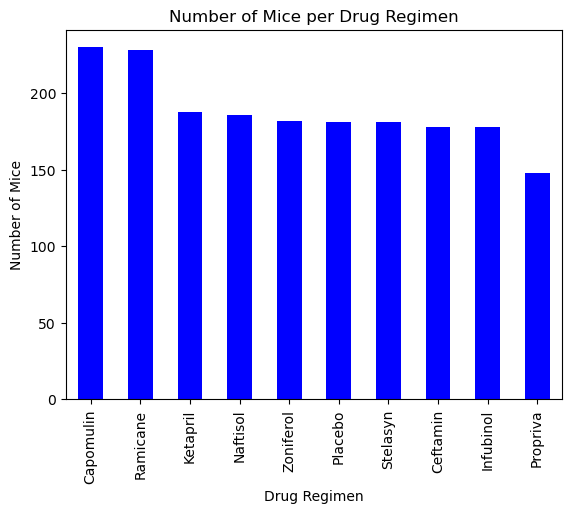

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_regimen = regimen_df['Mouse ID'].count().sort_values(ascending=False)
pd_bar_graph = mice_regimen.plot(kind='bar', color='blue')
pd_bar_graph.set_title('Number of Mice per Drug Regimen')
pd_bar_graph.set_ylabel('Number of Mice')

plt.show()


In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(regimen_df, mice_regimen, color='blue')
plt.show()

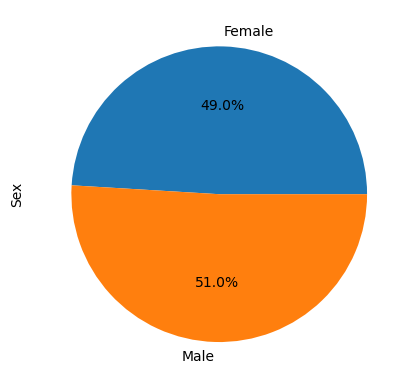

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_df.groupby('Sex')['Sex'].count()
pd_mice_sex = mice_sex.plot(kind='pie', autopct='%1.1f%%')

plt.show()

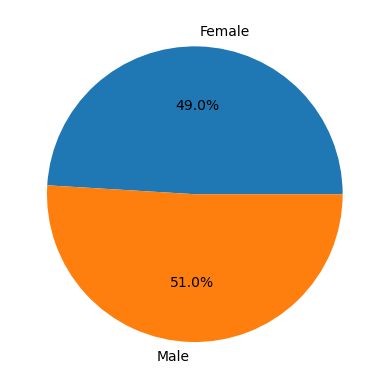

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = mice_sex.index
pyplot_mice_sex = plt.pie(mice_sex, labels= sex, autopct="%1.1f%%")

plt.show()


## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = clean_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_volume.reset_index()

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = final_tumor_df["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_mouse = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_data.append(final_tumor_mouse)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_mouse.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_mouse.mean()
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_mouse.loc[(final_tumor_mouse < lower_bound) | (final_tumor_mouse > upper_bound)]
    
    print(f"{drug}'s potential outliers: {outliers.count()}")

Capomulin's potential outliers: 0
Ramicane's potential outliers: 0
Infubinol's potential outliers: 1
Ceftamin's potential outliers: 0


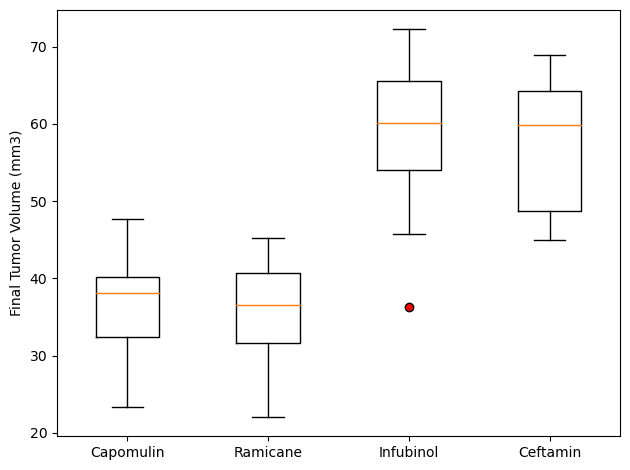

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, tumor_plot = plt.subplots()
tumor_plot.boxplot(tumor_volume_data, labels=regimen, flierprops={'markerfacecolor':'r'})
tumor_plot.set_ylabel('Final Tumor Volume (mm3)')
plt.tight_layout()

plt.show()

## Line and Scatter Plots

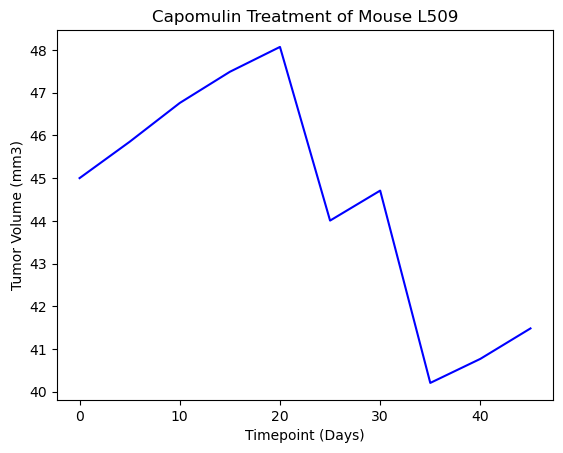

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse_id = 'l509'
mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse_id]

x_axis = mouse_df['Timepoint']
y_axis = mouse_df['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis, color='b')
plt.title('Capomulin Treatment of Mouse L509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

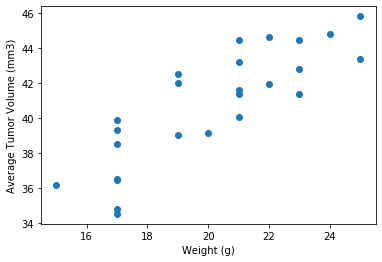

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


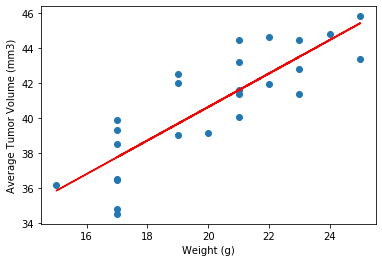

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

